In [1]:
8+4

12

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [4]:
df_ref = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/NN_DATA/NN_train.xlsx')

In [5]:
data=['CPI','DPI','EC','T','WC','1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [6]:
df=df_ref[data]

In [7]:
indvar=['1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [8]:
df=df.drop_duplicates(keep='last',subset=indvar)

In [9]:
y_CPI = df['CPI']
y_DPI = df['DPI']
y_EC_D=df['EC']
y_T_D=df['T']
y_WC=df['WC']

In [10]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,2.300,15.0,0.670000,30.0,11.8,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.320,15.0,0.710000,30.0,10.4,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.320,15.0,0.640000,30.0,10.8,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.320,15.0,0.640000,30.0,10.8,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.320,15.0,0.670000,30.0,11.8,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3.530,84.0,1.180000,148.0,17.6,0,24,21,5.2,2800,...,0,0,0,0,40,0,0,0,0,0
111,3.550,80.0,0.864750,210.0,12.0,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
112,3.556,87.0,0.938455,220.0,9.5,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
113,3.580,84.0,1.180000,118.0,15.4,0,25,22,4.4,2800,...,0,0,0,0,40,0,0,0,0,0


In [11]:
df=df[indvar]

In [12]:
y=y_CPI

In [13]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.1) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df_ver_1=df.drop(concol,axis=1)
df_ver_1.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of CIRC_TIME',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '3MFTSum of WI', '4SGDSum of SURE', '4SGDSum of CIRC_TIME',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '4SGDSum of BEKLEME',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '7SCD2Sum of BEKLEME', '8DSBSum of kapalı', '8DSBSum of SURE',
       '8DSBSum of CIRC_TIME', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEK

In [14]:
df_ver_2=df_ver_1

In [15]:
correlation_matrix=df_ver_2.corr()
correlated_features = set()

In [16]:
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [17]:
df_ver_3 = df_ver_2.drop(labels=correlated_features, axis=1)
df_ver_3

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of TEPE_C,1OYSum of BEKLEME,2AYSum of kapalı,...,7SCD2Sum of ÜST_C,7SCD2Sum of TEPE_C,8DSBSum of kapalı,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
0,0,0,0,0.0,0,0,0.0,0.0,0,0,...,7.0,0.0,0,0,1,0,0,0,0,0
1,0,0,0,0.0,0,0,0.0,0.0,0,0,...,7.0,0.0,0,0,1,0,0,0,0,0
2,0,0,0,0.0,0,0,0.0,0.0,0,0,...,2.4,0.2,0,0,0,0,0,0,0,0
3,0,0,0,0.0,0,0,0.0,0.0,0,0,...,2.4,0.2,0,0,0,0,0,0,0,0
4,0,0,0,0.0,0,0,0.0,0.0,0,0,...,7.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,24,21,5.2,2800,46,21.0,0.0,0,0,...,18.0,0.0,0,0,41,40,0,0,0,0
111,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,0.0,0,0,124,123,0,0,0,0
112,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,8.0,6.0,0,0,94,20,73,0,0,0
113,0,25,22,4.4,2800,46,22.0,0.0,0,0,...,9.0,0.0,0,0,41,40,0,0,0,0


In [18]:
X=df_ver_3

In [19]:
X

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of TEPE_C,1OYSum of BEKLEME,2AYSum of kapalı,...,7SCD2Sum of ÜST_C,7SCD2Sum of TEPE_C,8DSBSum of kapalı,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
0,0,0,0,0.0,0,0,0.0,0.0,0,0,...,7.0,0.0,0,0,1,0,0,0,0,0
1,0,0,0,0.0,0,0,0.0,0.0,0,0,...,7.0,0.0,0,0,1,0,0,0,0,0
2,0,0,0,0.0,0,0,0.0,0.0,0,0,...,2.4,0.2,0,0,0,0,0,0,0,0
3,0,0,0,0.0,0,0,0.0,0.0,0,0,...,2.4,0.2,0,0,0,0,0,0,0,0
4,0,0,0,0.0,0,0,0.0,0.0,0,0,...,7.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,24,21,5.2,2800,46,21.0,0.0,0,0,...,18.0,0.0,0,0,41,40,0,0,0,0
111,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,0.0,0,0,124,123,0,0,0,0
112,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,8.0,6.0,0,0,94,20,73,0,0,0
113,0,25,22,4.4,2800,46,22.0,0.0,0,0,...,9.0,0.0,0,0,41,40,0,0,0,0


In [20]:
y

0      2.300
1      2.320
2      2.320
3      2.320
4      2.320
       ...  
110    3.530
111    3.550
112    3.556
113    3.580
114    3.580
Name: CPI, Length: 80, dtype: float64

In [21]:
X.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of TEPE_C', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '7SCD2Sum of TEPE_C', '8DSBSum of kapalı', '8DSBMax of DEVIR',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE',
       '10KUSum of GAUDI_offset'],
      dtype='object')

In [30]:
NN=['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of TEPE_C', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '7SCD2Sum of TEPE_C', '8DSBSum of kapalı', '8DSBMax of DEVIR',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE',
       '10KUSum of GAUDI_offset']

In [22]:
#from keras.optimizers import SGD
#epochs=1000
#learning_rate = 0.1
#decay_rate = learning_rate / epochs
#momentum = 0.8

#sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

#NN_model.compile(loss='mean_squared_error',
              #optimizer=sgd,
              #metrics=['mean_squared_error'])

In [23]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
import tensorflow as tf

adam=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
NN_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4992      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 169,857
Trainable params: 169,857
Non-trainable params: 0
_________________________________________________________________


In [24]:
checkpoint_name = 'Weights-{epoch:03d}--{mean_squared_error:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [25]:
NN_model.fit(X, y, epochs=1000, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 22.4589 - mean_squared_error: 22.4589
Epoch 1: mean_squared_error improved from inf to 1889.68750, saving model to Weights-001--1889.68750.hdf5
2/2 [==============================] - 2s 861ms/step - loss: 1889.6875 - mean_squared_error: 1889.6875 - val_loss: 131.9803 - val_mean_squared_error: 131.9803
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 130.3067 - mean_squared_error: 130.3067
Epoch 2: mean_squared_error improved from 1889.68750 to 446.92896, saving model to Weights-002--446.92896.hdf5
2/2 [==============================] - 0s 131ms/step - loss: 446.9290 - mean_squared_error: 446.9290 - val_loss: 1260.3660 - val_mean_squared_error: 1260.3660
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 1080.1156 - mean_squared_error: 1080.1156
Epoch 3: mean_squared_error did not improve from 446.92896
2/2 [==============================] - 0s 59ms/step - loss: 806.0496 - mean_square

Epoch 26/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 26: mean_squared_error did not improve from 0.09791
2/2 [==============================] - 0s 91ms/step - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 27/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2471 - mean_squared_error: 0.2471
Epoch 27: mean_squared_error did not improve from 0.09791
2/2 [==============================] - 0s 84ms/step - loss: 0.1805 - mean_squared_error: 0.1805 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 28/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 28: mean_squared_error did not improve from 0.09791
2/2 [==============================] - 0s 93ms/step - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 29/1000
1/2 [==============>...............] - ETA: 0s - loss

Epoch 51/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 51: mean_squared_error improved from 0.05043 to 0.05034, saving model to Weights-051--0.05034.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 52/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 52: mean_squared_error improved from 0.05034 to 0.04956, saving model to Weights-052--0.04956.hdf5
2/2 [==============================] - 0s 150ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 53/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 53: mean_squared_error improved from 0.04956 to 0.04948, saving model to Weights-053--0.04948.hdf5
2/2 [==============================] - 0s 160ms/step - loss: 0.0495 - me

2/2 [==============================] - 0s 154ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 75/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 75: mean_squared_error did not improve from 0.03772
2/2 [==============================] - 0s 85ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 76/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 76: mean_squared_error improved from 0.03772 to 0.03684, saving model to Weights-076--0.03684.hdf5
2/2 [==============================] - 0s 156ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 77/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 77: mean_squared_error did not improve from 0.03684
2/2 [=============

1/2 [==============>...............] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 98: mean_squared_error improved from 0.03122 to 0.03115, saving model to Weights-098--0.03115.hdf5
2/2 [==============================] - 0s 214ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 99/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 99: mean_squared_error did not improve from 0.03115
2/2 [==============================] - 0s 79ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 100/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 100: mean_squared_error did not improve from 0.03115
2/2 [==============================] - 0s 90ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 101/1000
1/2 [===========

2/2 [==============================] - 0s 72ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 123/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 123: mean_squared_error improved from 0.02631 to 0.02607, saving model to Weights-123--0.02607.hdf5
2/2 [==============================] - 0s 139ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 124/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 124: mean_squared_error improved from 0.02607 to 0.02586, saving model to Weights-124--0.02586.hdf5
2/2 [==============================] - 0s 139ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 125/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 125: mean_squared_

2/2 [==============================] - 0s 95ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 148/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 148: mean_squared_error did not improve from 0.02262
2/2 [==============================] - 0s 108ms/step - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 149/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 149: mean_squared_error improved from 0.02262 to 0.02243, saving model to Weights-149--0.02243.hdf5
2/2 [==============================] - 0s 197ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 150/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 150: mean_squared_error improved from 0.02243 to 0.02164, saving 

1/2 [==============>...............] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 172: mean_squared_error did not improve from 0.01947
2/2 [==============================] - 0s 86ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 173/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 173: mean_squared_error did not improve from 0.01947
2/2 [==============================] - 0s 92ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 174/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 174: mean_squared_error improved from 0.01947 to 0.01882, saving model to Weights-174--0.01882.hdf5
2/2 [==============================] - 0s 160ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 175/1000
1/2 [========

Epoch 197/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 197: mean_squared_error did not improve from 0.01617
2/2 [==============================] - 0s 92ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 198/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 198: mean_squared_error did not improve from 0.01617
2/2 [==============================] - 0s 143ms/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 199/1000
2/2 [==============================] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 199: mean_squared_error did not improve from 0.01617
2/2 [==============================] - 0s 194ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 200/1000
1/2 [==============>...............] - ETA: 

Epoch 223/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 223: mean_squared_error did not improve from 0.01502
2/2 [==============================] - 0s 81ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 224/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 224: mean_squared_error did not improve from 0.01502
2/2 [==============================] - 0s 73ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 225/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 225: mean_squared_error did not improve from 0.01502
2/2 [==============================] - 0s 82ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 226/1000
1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 81ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 249/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 249: mean_squared_error did not improve from 0.01352
2/2 [==============================] - 0s 82ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 250/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 250: mean_squared_error did not improve from 0.01352
2/2 [==============================] - 0s 81ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 251/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 251: mean_squared_error did not improve from 0.01352
2/2 [==============================] - 0s 82ms/step - loss: 0

2/2 [==============================] - 0s 92ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 275: mean_squared_error improved from 0.01306 to 0.01296, saving model to Weights-275--0.01296.hdf5
2/2 [==============================] - 0s 192ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 276/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 276: mean_squared_error did not improve from 0.01296
2/2 [==============================] - 0s 90ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 277/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 277: mean_squared_error improved from 0.01296 to 0.01163, saving m

2/2 [==============================] - 0s 82ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 301/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 301: mean_squared_error did not improve from 0.01163
2/2 [==============================] - 0s 81ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 302: mean_squared_error did not improve from 0.01163
2/2 [==============================] - 0s 82ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 303/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 303: mean_squared_error did not improve from 0.01163
2/2 [==============================] - 0s 81ms/step - loss: 0

Epoch 327/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 327: mean_squared_error did not improve from 0.01142
2/2 [==============================] - 0s 79ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 328: mean_squared_error did not improve from 0.01142
2/2 [==============================] - 0s 89ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 329: mean_squared_error did not improve from 0.01142
2/2 [==============================] - 0s 82ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 330/1000
1/2 [==============>...............] - ETA: 0s

Epoch 353/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 353: mean_squared_error did not improve from 0.01044
2/2 [==============================] - 0s 71ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 354/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 354: mean_squared_error did not improve from 0.01044
2/2 [==============================] - 0s 71ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 355: mean_squared_error did not improve from 0.01044
2/2 [==============================] - 0s 82ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s

Epoch 379/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 379: mean_squared_error did not improve from 0.00989
2/2 [==============================] - 0s 69ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 380/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 380: mean_squared_error did not improve from 0.00989
2/2 [==============================] - 0s 71ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 381/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 381: mean_squared_error did not improve from 0.00989
2/2 [==============================] - 0s 71ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 382/1000
1/2 [==============>...............] - ETA: 0s

1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 405: mean_squared_error did not improve from 0.00959
2/2 [==============================] - 0s 82ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 406/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 406: mean_squared_error did not improve from 0.00959
2/2 [==============================] - 0s 69ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 407/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 407: mean_squared_error did not improve from 0.00959
2/2 [==============================] - 0s 71ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 408/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0080

1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 431: mean_squared_error did not improve from 0.00806
2/2 [==============================] - 0s 71ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 432/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 432: mean_squared_error did not improve from 0.00806
2/2 [==============================] - 0s 84ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 433/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 433: mean_squared_error did not improve from 0.00806
2/2 [==============================] - 0s 96ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 434/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0051

1/2 [==============>...............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 457: mean_squared_error did not improve from 0.00806
2/2 [==============================] - 0s 88ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 458/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 458: mean_squared_error did not improve from 0.00806
2/2 [==============================] - 0s 171ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 459/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 459: mean_squared_error did not improve from 0.00806
2/2 [==============================] - 0s 161ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 460/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.01

1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 483: mean_squared_error did not improve from 0.00796
2/2 [==============================] - 0s 93ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 484/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 484: mean_squared_error did not improve from 0.00796
2/2 [==============================] - 0s 91ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 485/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 485: mean_squared_error did not improve from 0.00796
2/2 [==============================] - 0s 101ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 486/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.014

Epoch 509/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 509: mean_squared_error did not improve from 0.00724
2/2 [==============================] - 0s 83ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 510/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 510: mean_squared_error did not improve from 0.00724
2/2 [==============================] - 0s 81ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 511/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 511: mean_squared_error did not improve from 0.00724
2/2 [==============================] - 0s 89ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 512/1000
1/2 [==============>...............] - ETA: 0s

1/2 [==============>...............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 535: mean_squared_error did not improve from 0.00678
2/2 [==============================] - 0s 91ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 536/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 536: mean_squared_error did not improve from 0.00678
2/2 [==============================] - 0s 83ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 537/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 537: mean_squared_error improved from 0.00678 to 0.00670, saving model to Weights-537--0.00670.hdf5
2/2 [==============================] - 0s 177ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 538/1000
1/2 [========

1/2 [==============>...............] - ETA: 0s - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 561: mean_squared_error improved from 0.00670 to 0.00657, saving model to Weights-561--0.00657.hdf5
2/2 [==============================] - 0s 162ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 562/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 562: mean_squared_error did not improve from 0.00657
2/2 [==============================] - 0s 79ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 563/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 563: mean_squared_error did not improve from 0.00657
2/2 [==============================] - 0s 75ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 564/1000
1/2 [========

Epoch 587/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 587: mean_squared_error did not improve from 0.00637
2/2 [==============================] - 0s 77ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 588/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 588: mean_squared_error did not improve from 0.00637
2/2 [==============================] - 0s 78ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 589/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 589: mean_squared_error did not improve from 0.00637
2/2 [==============================] - 0s 86ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 590/1000
1/2 [==============>...............] - ETA: 0s

1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 613: mean_squared_error improved from 0.00637 to 0.00542, saving model to Weights-613--0.00542.hdf5
2/2 [==============================] - 0s 169ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 614/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 614: mean_squared_error did not improve from 0.00542
2/2 [==============================] - 0s 84ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 615/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 615: mean_squared_error did not improve from 0.00542
2/2 [==============================] - 0s 96ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 616/1000
1/2 [========

1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 639: mean_squared_error did not improve from 0.00542
2/2 [==============================] - 0s 94ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 640/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 640: mean_squared_error did not improve from 0.00542
2/2 [==============================] - 0s 80ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 641/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 641: mean_squared_error did not improve from 0.00542
2/2 [==============================] - 0s 88ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 642/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0035

1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 665: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 86ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 666/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 666: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 83ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 667/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 667: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 78ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 668/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0086

1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 691: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 86ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 692/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 692: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 91ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 693/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 693: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 75ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 694/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0056

1/2 [==============>...............] - ETA: 0s - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 717: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 78ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 718/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 718: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 77ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 719/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 719: mean_squared_error did not improve from 0.00501
2/2 [==============================] - 0s 76ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 720/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0019

Epoch 743/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 743: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 110ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 744/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 744: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 100ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 745/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 745: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 91ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 746/1000
1/2 [==============>...............] - ETA: 

1/2 [==============>...............] - ETA: 0s - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 769: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 109ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 770/1000
2/2 [==============================] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 770: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 192ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 771/1000
2/2 [==============================] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 771: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 172ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 772/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0

1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 795: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 72ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 796/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 796: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 80ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 797/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 797: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 75ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 798/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0049

1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 821: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 72ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 822/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 822: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 82ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 823/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 823: mean_squared_error did not improve from 0.00422
2/2 [==============================] - 0s 74ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 824/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0015

Epoch 847/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 847: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 66ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 848/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 848: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 71ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 849/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 849: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 75ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 850/1000
1/2 [==============>...............] - ETA: 0s

1/2 [==============>...............] - ETA: 0s - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 873: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 77ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 874/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 874: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 81ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 875/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 875: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 91ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 876/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0074

1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 899: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 91ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 900/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 900: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 81ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 901/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 901: mean_squared_error did not improve from 0.00298
2/2 [==============================] - 0s 81ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 902/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0070

1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 925: mean_squared_error did not improve from 0.00247
2/2 [==============================] - 0s 88ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0664 - val_mean_squared_error: 0.0664
Epoch 926/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 926: mean_squared_error did not improve from 0.00247
2/2 [==============================] - 0s 87ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 927/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 927: mean_squared_error did not improve from 0.00247
2/2 [==============================] - 0s 87ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 928/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0054

1/2 [==============>...............] - ETA: 0s - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 951: mean_squared_error did not improve from 0.00208
2/2 [==============================] - 0s 77ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 952/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 952: mean_squared_error did not improve from 0.00208
2/2 [==============================] - 0s 72ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 953/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 953: mean_squared_error did not improve from 0.00208
2/2 [==============================] - 0s 73ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 954/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0041

1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 977: mean_squared_error did not improve from 0.00208
2/2 [==============================] - 0s 73ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 978/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 978: mean_squared_error did not improve from 0.00208
2/2 [==============================] - 0s 70ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 979/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 979: mean_squared_error did not improve from 0.00208
2/2 [==============================] - 0s 83ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 980/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0120

In [26]:
# Load wights file of the best model :
wights_file = 'Weights-950--0.00208.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [27]:
df_test = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/NN_DATA/NN_test.xlsx')

In [31]:
X_test=df_test[NN]

In [32]:
predictions = NN_model.predict(X_test)
predictions=pd.DataFrame(predictions)

2/2 [==============================] - 0s 9ms/step


Result (Test)
MAE : 0.07333


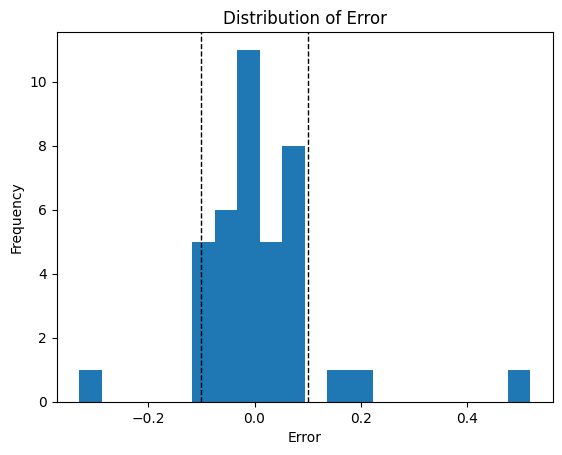

0.011282051282051283


In [33]:
y_pred= predictions
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
variable=df_test['CPI']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 10, min_samples_leaf= 5,
                                        min_samples_split= 10, n_estimators= 150)
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.059 52.524


In [36]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)

Result (Test)
MAE : 0.04780


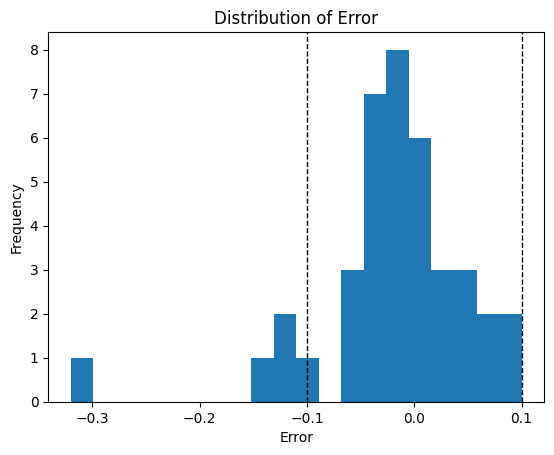

-0.02


In [37]:
y_pred= predictions
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
variable=df_test['CPI']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))